In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import init_printing
from sympy import *

In [9]:
x, y, r, s, t, w = symbols('x y r s t w')
a = -Rational(1,2) + Rational(1,2)*sp.cos(t) 
b = -Rational(1,2)*sp.sin(t) 
h, k = r*sp.cos(s), r*sp.sin(s)
exprs_u = Rational(1,3)*h*x**3 + Rational(1,3)*k*y**3 - k*x**2*y - h*y**2*x + Rational(1,2)*a*x**2 - Rational(1,2)*a*y**2 - b*x*y -Rational(1,2)*y**2
#u = lambdify((x, y), exprs_u, "numpy") 
exprs_du_theta = diff(exprs_u,x)*sp.cos(w) + diff(exprs_u,y)*sp.sin(w)
detm = simplify(diff(exprs_u,x,x)*diff(exprs_u,y,y) - diff(exprs_u,x,y)**2)
curv =  -(diff(exprs_u,x,x)*diff(exprs_u,y)**2 + diff(exprs_u,y,y)*diff(exprs_u,x)**2  -
         2*diff(exprs_u,x,y)*diff(exprs_u,x)*diff(exprs_u,y))
#/(diff(exprs_u,x)**2+diff(exprs_u,y)**2)**(Rational(3,2))

In [68]:
simplify(diff(exprs_u, x,x)+ diff(exprs_u, y,y))

-1

In [10]:
init_printing(use_latex='mathjax')
detm

     ⎛     2        2                              ⎞
-2⋅r⋅⎝2⋅r⋅x  + 2⋅r⋅y  + x⋅cos(s + t) - y⋅sin(s + t)⎠

In [60]:
r1,s1, t1, w1 = 1.0, np.pi/3.0, np.pi, np.pi/8.0 
w2 = np.pi/6.0
uu = exprs_u.subs({t:t1,s:s1,r:r1 })
duu_t = exprs_du_theta.subs({t:t1,s:s1,r:r1, w:w1 })
duu_t2 = exprs_du_theta.subs({t:t1,s:s1,r:r1, w:w2 })
detmm =detm.subs({t:t1,s:s1,r:r1 })
curvv = curv.subs({t:t1,s:s1,r:r1 })

In [61]:
u = lambdify((x, y), uu, "numpy") 
jacD = lambdify((x, y), detmm, "numpy") 
kappa =   lambdify((x, y), curvv, "numpy")
du_t = lambdify((x, y), duu_t, "numpy")
du_t2 = lambdify((x, y), duu_t2, "numpy")

In [65]:
wd = 0.5
N = 1200
xx, yy  = np.linspace(-wd,wd,N), np.linspace(-wd,wd,N)
X, Y = np.meshgrid(xx, yy)
U = u(X,Y)
DU1 = du_t(X,Y)
DU2 = du_t2(X,Y)
Jdet = jacD(X,Y)
K = kappa(X,Y)

<IPython.core.display.Javascript object>


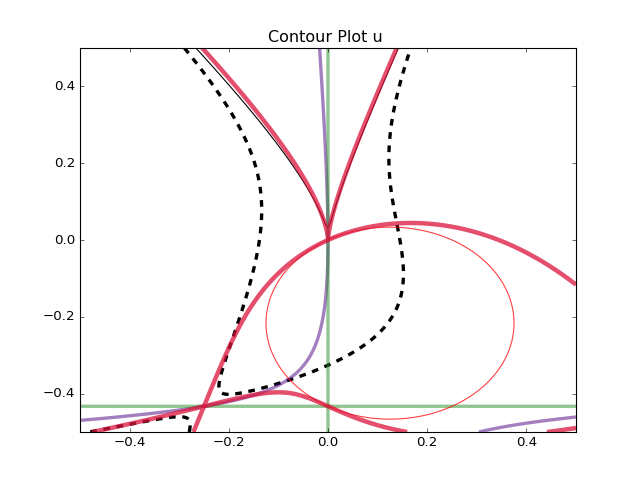

In [67]:

plt.figure()
levels = [-0.01, 0.00001]
line_widths = (3,1)
plt.contour(X,Y, U, levels,                     # levels lot plot
                 linewidths = line_widths,            # line widths
                 colors = 'Black'                  # line widths
                 )

levels = [0.000]
plt.contour(X,Y, DU1, levels,                     # levels lot plot
                 linewidths=3,                    # line widths
                 colors = 'Indigo',
                 alpha = 0.5
                 )

levels = [0.000]
plt.contour(X,Y, DU2, levels,                     # levels lot plot
                 linewidths=3,                    # line widths
                 colors = 'ForestGreen',
                 alpha = 0.5
                 )

plt.contour(X,Y, Jdet, levels,                     # levels lot plot
                 linewidths=1,            # line widths
                 colors = 'Red',  
                 alpha = 0.75
                 )

plt.contour(X,Y, K, levels,                     # levels lot plot
                 linewidths=4,            # line widths
                 colors = 'Crimson',  
                 alpha = 0.75
                 )


plt.title('Contour Plot u ')        # title

plt.show()

In [64]:
manual_locations = [(0.5, 0.0), (-0.5, -0.0), (0, 0.5), (0.5, 0.5)]

line_colours = ('BlueViolet', 'Crimson', 'ForestGreen', 'Indigo')
line_widths = (1, 1.5, 2, 2.5)
CS = plt.contour(X,Y, Z, 4,                     # levels lot plot
                 linewidths=line_widths,            # line widths
                 colors = line_colours                  # line widths
                 )
plt.clabel(CS, inline=1,                            # add labels
          fontsize=10,                             # label font size 
          manual=manual_locations)                 # label locations

NameError: name 'Z' is not defined

In [1]:
% cd ..


/home/jaime/prog/py


In [2]:
% cd tgit

/home/jaime/prog/py/tgit


In [4]:
% cwd


ERROR: Line magic function `%cwd` not found.
